In [1]:
%store -r y
%store -r x
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Introduction
To determine the most effective model for classifying the quality of red wine. The following steps will be undertaken:

1. Create the following models:
  - Logistic Regression
  - Linear SVC
  - SVC with rbf-kernel
  - Random Forest Classifier
  - Gradient Boosting Classifier


2. Tune the most promising models

3. Assess the balance between precision and recall to determine if further tuning is needed

In [2]:
#Split data into training and testing set
#Stratify is used as there is a skewed amount of classes. This splits data with similar proportion of classes in each bin
X_train, X_test, y_train, y_test = train_test_split(x, y['label_binary'], test_size=0.2, 
                                                    random_state=23, stratify=y['label_binary'])
#Scale data. Some of the models require scaled data
#As the input data seems mostly Gaussian a simple standardization seems like it should be effective
sc = StandardScaler() 
#Fit & transform data
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Model Creation
### Linear Models

In [3]:
#Create LogisticRegression model
log_r = LogisticRegression(solver='newton-cg')
log_r.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

[[272   5]
 [ 32  11]]


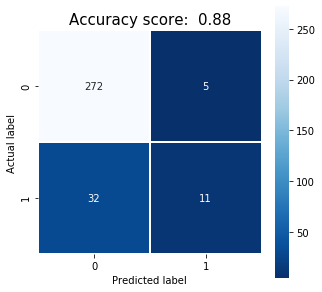

In [4]:
#Testing the model using confusion matrix
predictions = log_r.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
#Plot heatmap to visualise confusion matrix
score = log_r.score(X_test, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

In [15]:
#Linear svc
lin_svc = LinearSVC(max_iter=10000)
#Fit using scaled data to aid convergence
lin_svc.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

[[275   2]
 [ 32  11]]


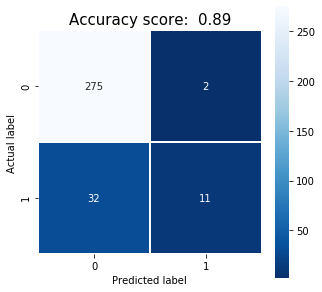

In [16]:
#Testing the svm model using confusion matrix
predictions_lin_svc = lin_svc.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, predictions_lin_svc)
#Plot heatmap to visualise confusion matrix
score = lin_svc.score(X_test_scaled, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

In [7]:
#SVC with rbf kernel
#SVMs are suseptible to the parameters chosen and to scale of data. So scaled data will be input into this model
svc = SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

[[270   7]
 [ 32  11]]


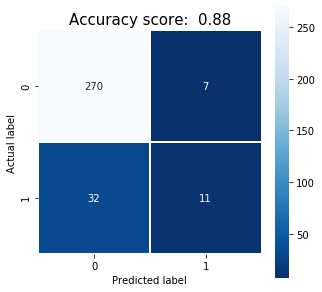

In [12]:
#Testing the svm model using confusion matrix
predictions_svc = svc.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, predictions_svc)
#Plot heatmap to visualise confusion matrix
score = svc.score(X_test_scaled, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)


| Linear Model                       | Accuracy(%) |
| :-: | :-: |
|------------------------------------|-------------|
| Logistic regression                | 88          |
| Linear SVC(Support vector machine) | 89          |
| SVC with rbf kernel                | 88          |

These all show respectable accuracy without any optimisation. So with tuning it is hoped that the accuracy can pushed even higher. 

As the accuracies of these models are all very close to each other, optimisation will be conducted on the SVC model (with rbf kernel). These models allow for more complexity, therefore provide a good opportunity to exhibit the best accuracy out the three.

In [17]:
#Grid Search with Cross-Validation
#Using a wide range of C and gamma values to try to locate approximate values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_svc = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True, n_jobs=-1)
grid_search_svc.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search_svc.best_params_}")
print(f"Best Score: {grid_search_svc.score(X_test, y_test)}")
print(f"Best estimator: {grid_search_svc.best_estimator_}")

Best Parameters: {'C': 1, 'gamma': 1}
Best Score: 0.865625
Best estimator: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


[[274   3]
 [ 30  13]]


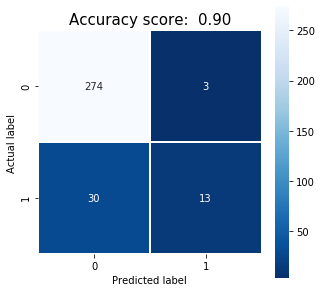

In [18]:
#Testing the gridsearch svm model using confusion matrix
predictions_grid_search_svc = grid_search_svc.predict(X_test_scaled)
cm = metrics.confusion_matrix(y_test, predictions_grid_search_svc)
#Plot heatmap to visualise confusion matrix
score = grid_search_svc.score(X_test_scaled, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

Text(87.0, 0.5, 'C')

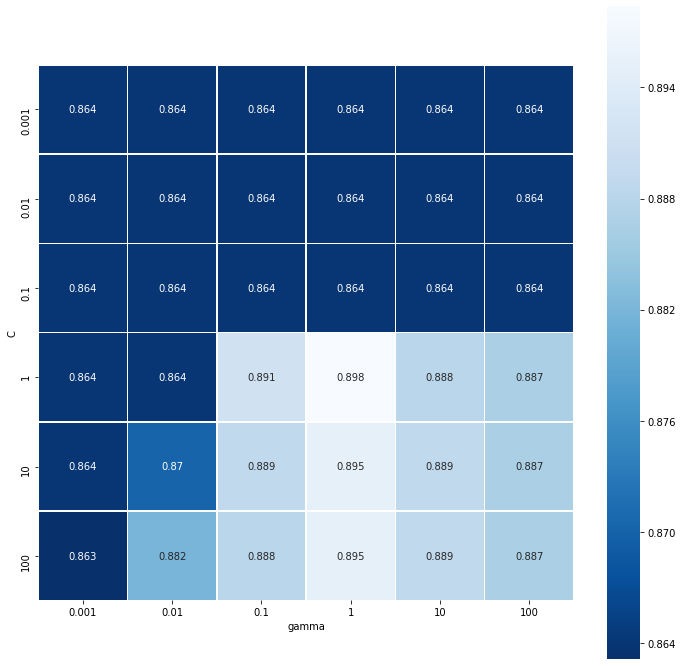

In [19]:
results = pd.DataFrame(grid_search_svc.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
plt.figure(figsize=(12,12))
sns.heatmap(scores, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='.3',
           xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('gamma')
plt.ylabel('C')


Here we can see that the optimal values for gamma lies between 0.1 and 10. The optimal value for C is approximately 1. Running the grid search again using a tighter grid focused around C = 1 and gamma = 1 could potentially up the accuracy. 

Best Parameters: {'C': 3, 'gamma': 0.7}
Best Score: 0.90625
Best estimator: SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Text(159.0, 0.5, 'C')

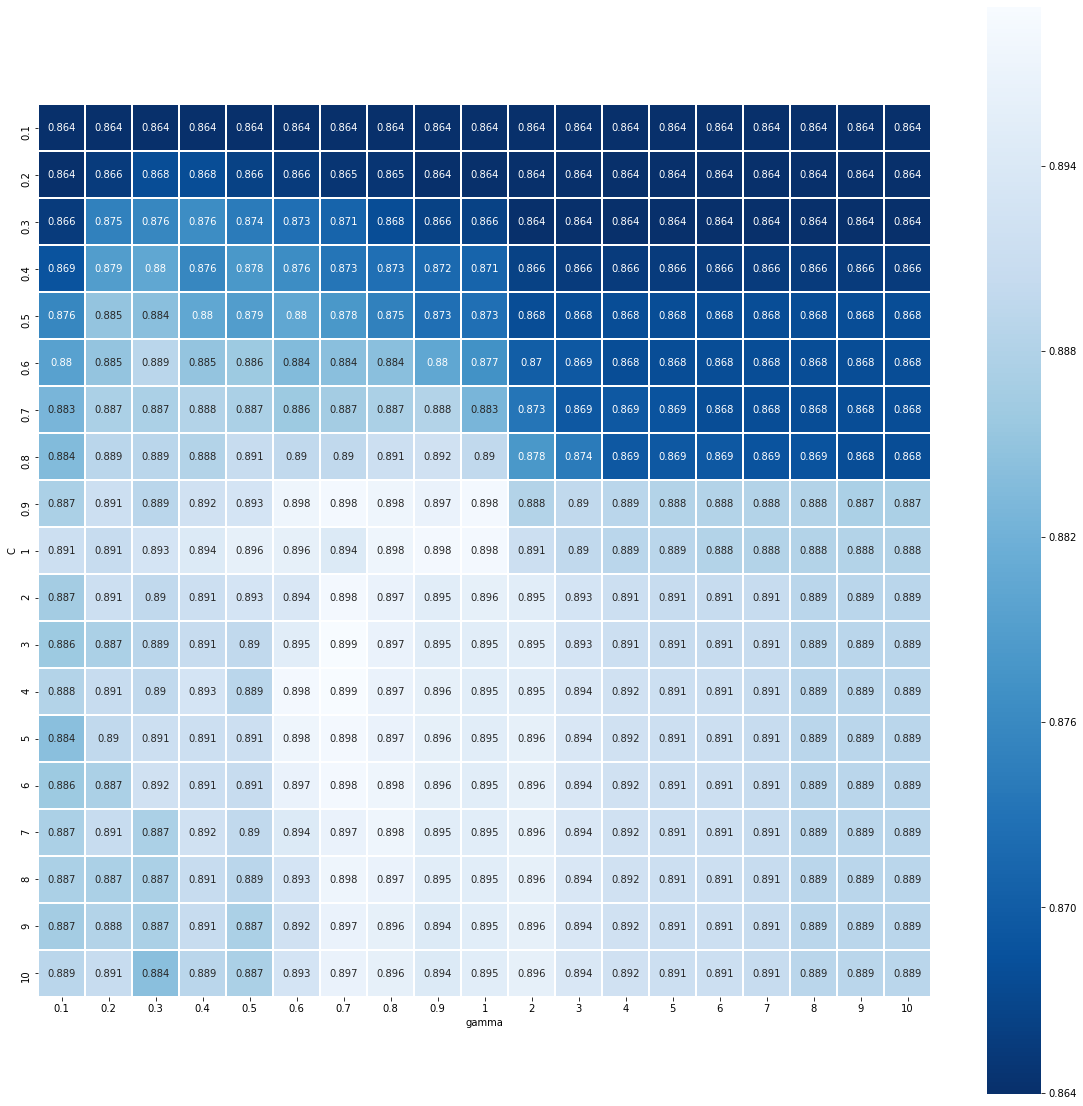

In [28]:
param_grid = {'C': [x/10 for x in range(1,10)]+[x for x in range(1,11)],
              #list from 0.1 to 10
             'gamma': [x/10 for x in range(1,10)]+[x for x in range(1,11)]
             #list from 0.1 to 10
             }
grid_search_fine_tune = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search_fine_tune.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search_fine_tune.best_params_}")
print(f"Best Score: {grid_search_fine_tune.score(X_test_scaled, y_test)}")
print(f"Best estimator: {grid_search_fine_tune.best_estimator_}")

results = pd.DataFrame(grid_search_fine_tune.cv_results_)
scores = np.array(results.mean_test_score).reshape(19, 19)
plt.figure(figsize=(20,20))
sns.heatmap(scores, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='.3',
           xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('gamma')
plt.ylabel('C')

[[274   3]
 [ 30  13]]


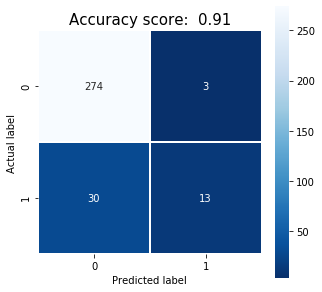

In [29]:
#Plot heatmap to show confusion matrix of model using GridSearchCV to fine tune parameters of SVC
score = grid_search_fine_tune.score(X_test_scaled, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

The SVC model optimised using GridSearchCV shows an accuracy of 91% on the test set.

In [ ]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, grid_search_fine_tune.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', label='Threshold Zero', fillstyle='none')
plt.plot(precision, recall, label="Precision Recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc='best')

In [31]:
#Random forest Classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

C:\Users\lukeb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
forest = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(500, 1500, 11)]
criterion = ['gini', 'entropy']
max_features = list(range(1,11))
max_depth = list(range(1,11))
min_samples_split = [2, 5, 10]
min_samples_leaf = [2, 5, 8]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_cv = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
random_cv.fit(X_train, y_train)
print(f"Random Score: {random_cv.score(X_test, y_test)}")
print(f"Best Paramters: {random_cv.best_params_}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished


Random Score: 0.890625
Best Paramters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 9, 'criterion': 'entropy', 'bootstrap': False}


In [33]:
#Using gridsearch to optimise model further
n_estimators = [int(x) for x in np.linspace(500, 700, 5)]
criterion = ['entropy']
max_features = list(range(2,5))
max_depth = list(range(8,10))
min_samples_split = [2, 3]
min_samples_leaf = [2, 3]
bootstrap = [False]
param_grid_forest = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_search_forest = GridSearchCV(forest, param_grid_forest, cv=5, return_train_score=True, scoring='accuracy', n_jobs=-1)
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [34]:
print(f"Best Estimator: {grid_search_forest.best_estimator_}")
print(f"Best Score: {grid_search_forest.score(X_test, y_test)}")

Best Estimator: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=550,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best Score: 0.890625


[[271   6]
 [ 29  14]]


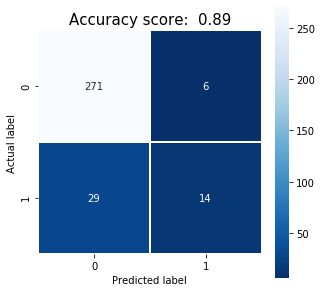

In [35]:
#Testing the random forest classifier model using confusion matrix
predictions_forest = grid_search_forest.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions_forest)
#Plot heatmap to show confusion matrix
score = grid_search_forest.score(X_test, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

In [44]:
#GradientBoostingClassifier
#Create gradient boosting classifier with default parameters - learning_rate = 0.1, n_estimators=100
#gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=2, learning_rate=0.05)
gbc = GradientBoostingClassifier()
#gbc.fit(X_train, y_train)
#print(gbc.score(X_train, y_train))
#print(gbc.score(X_test, y_test))

In [43]:
#Using gridsearch to optimise model further
learning_rate = [x/100 for x in range(1, 11)]
n_estimators = [int(x) for x in np.linspace(100, 500, 5)]
max_depth = list(range(1,6))
min_samples_split = np.linspace(0.1, 1.0, 4, endpoint=True)
max_features = [3,5,7]
param_grid_forest = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'max_features': max_features}
grid_search_gbc = GridSearchCV(gbc, param_grid_forest, cv=5, return_train_score=True, scoring='roc_auc', n_jobs=-1)
grid_search_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  validation_fractio

[[270   7]
 [ 22  21]]


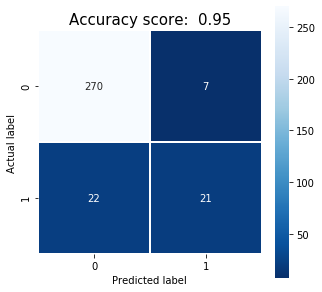

In [49]:
#Testing the random forest classifier model using confusion matrix
predictions_gbc = grid_search_gbc.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions_gbc)
#Plot heatmap to show confusion matrix
score = grid_search_gbc.score(X_test, y_test)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt ='g');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(f"Accuracy score: {score: .2f}", size = 15)
print(cm)

Tuning the Gradient Boosting classifier has managed to produce a model with 95% accuracy. However, for binary datasets with  very skewed frequencies within classes, accuracy is not a very good metric for assessing the quality of a model. This is why the gridsearch optimised using the area under the curve of the receiver operating characteristics curve AUC of ROC.

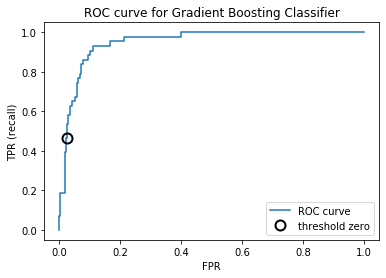

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, grid_search_gbc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
#find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold zero',
        fillstyle="none", c='k', mew=2)
plt.title("ROC curve for Gradient Boosting Classifier")
plt.legend(loc=4)

The graph above shows the the total positive rate (TPR AKA recall) vs the false positive rate (FPR) for each threshold of the decision function. This shows that it could be possible to achieve a recall of approx 95% with a small increase of about 15% in FPR. 

Tuning the model using the test set would represent a data leakage and could lead to an falsely optimistic assessment of the model's "accurcacy". Also it seems like there is naturally a fair balance between precision and recall, so further tuning will not be conducted. 

In [ ]:
#Optimise/tune models
#Gridsearch
#Cross validation
#Expand random gridsearch to run overnight
#When productionising. Is it possible to pickle?/transfer the best model object into a .py file?
#Update classifiers and gridsearches to test based on ROC_AUC_score - scoring='roc_auc'
#create graphs to show roc curve then set the boundaries to optimise precision/recall or whatever.

In [ ]:
#try bayes classifiers on individual qualities and good/bad

In [ ]:
#try ordinal regression